
# L1 Penalty and Sparsity in Logistic Regression

Comparison of the sparsity (percentage of zero coefficients) of solutions when
L1, L2 and Elastic-Net penalty are used for different values of C. We can see
that large values of C give more freedom to the model.  Conversely, smaller
values of C constrain the model more. In the L1 penalty case, this leads to
sparser solutions. As expected, the Elastic-Net penalty sparsity is between
that of L1 and L2.

We classify 8x8 images of digits into two classes: 0-4 against 5-9.
The visualization shows coefficients of the models for varying C.


C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                31.25%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


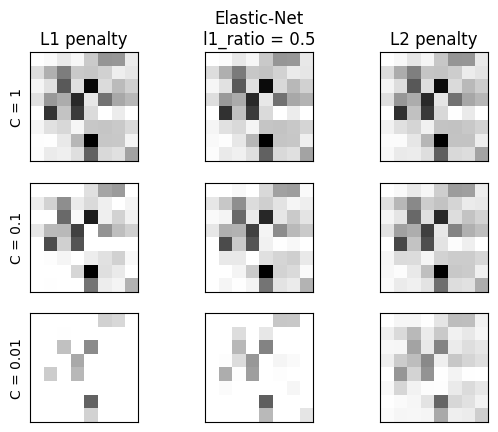

In [6]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0.000000000000000000000) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0.000000000000000000000) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0.000000000000000000000) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

### Logistic Regression with L1 Regularization

#### Concept

Logistic Regression with L1 regularization (also known as Lasso Regularization) adds a penalty equivalent to the absolute value of the magnitude of the coefficients to the logistic loss function. This form of regularization can drive some of the coefficients to zero, effectively performing feature selection.

#### Mathematical Background

The objective function for L1-regularized logistic regression is:

$\
\min_{\beta} \left\{ \sum_{i=1}^{n} \log \left( 1 + \exp \left( -y_i (\vec{x}_i^T \beta + \beta_0) \right) \right) + \lambda \sum_{j=1}^{p} |\beta_j| \right\}
$

where:
- $\ \vec{x}_i$ are the feature vectors,
- $\ y_i$ are the binary labels,
- $\ \beta$ is the vector of coefficients,
- $\ \beta_0$ is the intercept,
- $\ \lambda$ is the regularization parameter.

#### Arguments in Sklearn

- **penalty**: Specifies the norm of the penalty. Use `"l1"` for L1 regularization.
- **C**: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
- **solver**: Algorithm to use in the optimization problem. `"saga"` is suitable for L1 regularization.

#### Logical Explanation

1. **Initialization**: Start with initial estimates for $\ \beta$.
2. **Iterative Optimization**: Use an optimization algorithm (like SAGA) to minimize the objective function.
3. **Feature Selection**: The L1 penalty will shrink some coefficients to exactly zero, effectively performing feature selection.

#### Advantages

- **Feature Selection**: Drives some coefficients to zero, effectively removing irrelevant features.
- **Simplicity**: Results in simpler and more interpretable models.
- **Improves Generalization**: Reduces overfitting by imposing a constraint on the magnitude of coefficients.

#### Disadvantages

- **Computationally Intensive**: Can be slower to converge, especially with large datasets.
- **Model Stability**: Small changes in the data can lead to different sets of selected features.

#### Example Usage in Sklearn

```python
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with L1 regularization
clf_l1 = LogisticRegression(penalty='l1', C=1.0, solver='saga', tol=0.01)

# Fit the model
clf_l1.fit(X_train, y_train)

# Predict
y_pred = clf_l1.predict(X_test)



### Logistic Regression with L2 Regularization

#### Concept

Logistic Regression with L2 regularization (also known as Ridge Regularization) adds a penalty equivalent to the square of the magnitude of the coefficients to the logistic loss function. This form of regularization shrinks the coefficients but does not set them exactly to zero.

#### Mathematical Background

The objective function for L2-regularized logistic regression is:

$\
\min_{\beta} \left\{ \sum_{i=1}^{n} \log \left( 1 + \exp \left( -y_i (\vec{x}_i^T \beta + \beta_0) \right) \right) + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}
$

where:
- $\ \vec{x}_i $ are the feature vectors,
- $\ y_i $ are the binary labels,
- $\ \beta $ is the vector of coefficients,
- $\ \beta_0 $ is the intercept,
- $\ \lambda $ is the regularization parameter.

#### Arguments in Sklearn

- **penalty**: Specifies the norm of the penalty. Use `"l2"` for L2 regularization.
- **C**: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
- **solver**: Algorithm to use in the optimization problem. Several solvers support L2 regularization, including `"saga"`, `"lbfgs"`, etc.

#### Logical Explanation

1. **Initialization**: Start with initial estimates for $\ \beta $.
2. **Iterative Optimization**: Use an optimization algorithm to minimize the objective function.
3. **Coefficient Shrinkage**: The L2 penalty shrinks the coefficients towards zero but does not set them exactly to zero.

#### Advantages

- **Improves Generalization**: Reduces overfitting by imposing a constraint on the magnitude of coefficients.
- **Computational Efficiency**: Generally faster convergence compared to L1 regularization.
- **Stable Model**: The coefficients are less sensitive to small changes in the training data.

#### Disadvantages

- **No Feature Selection**: Unlike L1 regularization, L2 regularization does not perform feature selection; all features are retained in the model.
- **Interpretability**: Can result in less interpretable models when compared to L1 regularization.

#### Example Usage in Sklearn

```python
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with L2 regularization
clf_l2 = LogisticRegression(penalty='l2', C=1.0, solver='saga', tol=0.01)

# Fit the model
clf_l2.fit(X_train, y_train)

# Predict
y_pred = clf_l2.predict(X_test)
